In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/creditcard.csv')

In [3]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [11]:
df.shape

(284807, 31)

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Remove 'Class' column and store it in a separate variable
original_class = df['Class']
df_features = df.drop('Class', axis=1)

# Normalize your feature data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Fit a Gaussian Mixture Model to your normalized feature data
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(scaled_features)

# Compute proportions of each class in original data
fraud_prop = original_class.mean()
non_fraud_prop = 1 - fraud_prop

# Sample synthetic features from your GMM
synthetic_features = gmm.sample(n_samples=df.shape[0]*4)[0]

# Reverse the normalization for your synthetic features
synthetic_features = scaler.inverse_transform(synthetic_features)

# Create a DataFrame for your synthetic data
synthetic_df = pd.DataFrame(synthetic_features, columns=df_features.columns)

# Make sure 'Time' and 'Amount' columns have only non-negative values
synthetic_df['Time'] = synthetic_df['Time'].abs()
synthetic_df['Amount'] = synthetic_df['Amount'].abs()

# Convert 'Time' column values to integer
synthetic_df['Time'] = synthetic_df['Time'].round(0).astype(int)

# Generate synthetic 'Class' label based on original distribution
synthetic_df['Class'] = np.random.choice([0,1], size=(synthetic_df.shape[0],), p=[non_fraud_prop, fraud_prop])

# Sort the dataframe based on the 'Time' column to maintain time series order
synthetic_df.sort_values(by='Time', inplace=True, ascending=True)

# Reset index of the DataFrame
synthetic_df.reset_index(drop=True, inplace=True)

In [17]:
synthetic_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.880818,1.199469,0.239715,0.301449,0.816455,2.082074,-0.445268,1.152704,0.139508,...,-0.350169,-0.838690,0.004406,-0.105254,0.449586,-0.303450,-0.216157,-0.194224,10.997939,0
1,0,0.588240,-0.564461,0.821965,1.988503,-0.366524,1.011392,-0.383368,0.408847,0.499770,...,0.268414,0.566283,-0.247681,0.450833,0.446461,-0.285168,-0.021253,0.093458,192.143438,0
2,1,0.722072,-1.289125,-0.541395,-1.581066,-1.078564,-2.342375,0.664029,-0.794500,-1.638395,...,-0.306203,-1.010618,-0.355670,0.321704,0.681291,-0.392377,-0.118895,0.020004,265.295306,0
3,1,1.220352,-0.933417,0.041422,-0.612450,-0.200652,1.413280,-1.413644,0.836838,2.225719,...,-0.022528,0.083420,0.125134,-0.118795,0.284554,-0.231406,-0.044358,-0.086093,17.459260,0
4,1,-6.549734,3.583699,-1.360912,0.730206,-1.958211,1.791863,-2.487584,-3.068560,0.404820,...,-1.754692,-0.140180,1.120304,1.171552,0.695772,0.008826,-0.542053,-0.561114,68.420743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139223,301508,3.067691,-2.288035,-3.655570,-0.838568,0.117102,1.456656,-0.473737,0.220328,1.929022,...,0.549006,1.271835,0.149163,-0.374885,-0.733573,-0.118360,-0.215843,-0.231385,312.788102,0
1139224,303630,0.988687,-0.288427,-1.278230,-0.339237,0.779381,-0.889848,1.161810,-0.523876,0.290682,...,0.134188,0.093993,-0.020195,0.108013,-0.521572,-0.790958,0.138631,0.089842,190.142030,0
1139225,306662,2.449685,-0.131501,-2.593083,-0.370901,1.891157,-0.847964,1.284755,-0.784585,0.346077,...,-0.122314,-0.232208,-0.070126,-0.167399,-0.256884,-0.795974,0.158134,0.309059,29.965994,0
1139226,306771,1.202679,-0.465870,-3.013207,1.149075,1.396543,0.199072,0.869536,-0.085120,-0.613880,...,0.582431,0.978971,-0.260392,0.410071,-0.558954,-0.335351,0.063206,0.103744,270.899206,0


In [18]:
synthetic_df.shape

(1139228, 31)

In [19]:
print('No Frauds', round(synthetic_df['Class'].value_counts()[0]/len(synthetic_df) * 100,2), '% of the dataset')
print('Frauds', round(synthetic_df['Class'].value_counts()[1]/len(synthetic_df) * 100,2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


/tmp/ipykernel_136275/690209895.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/tmp/ipykernel_136275/690209895.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


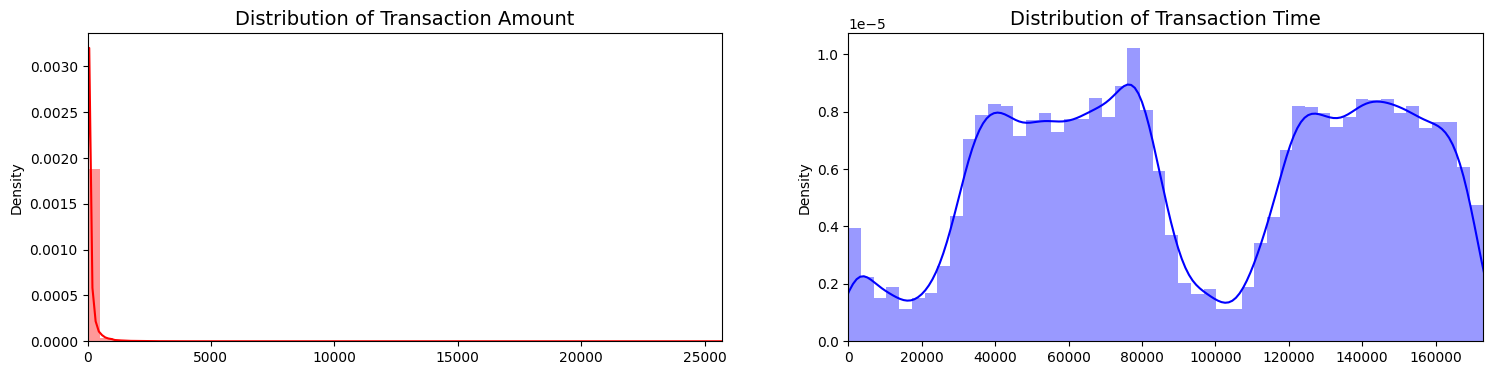

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

/tmp/ipykernel_136275/2617361728.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/tmp/ipykernel_136275/2617361728.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


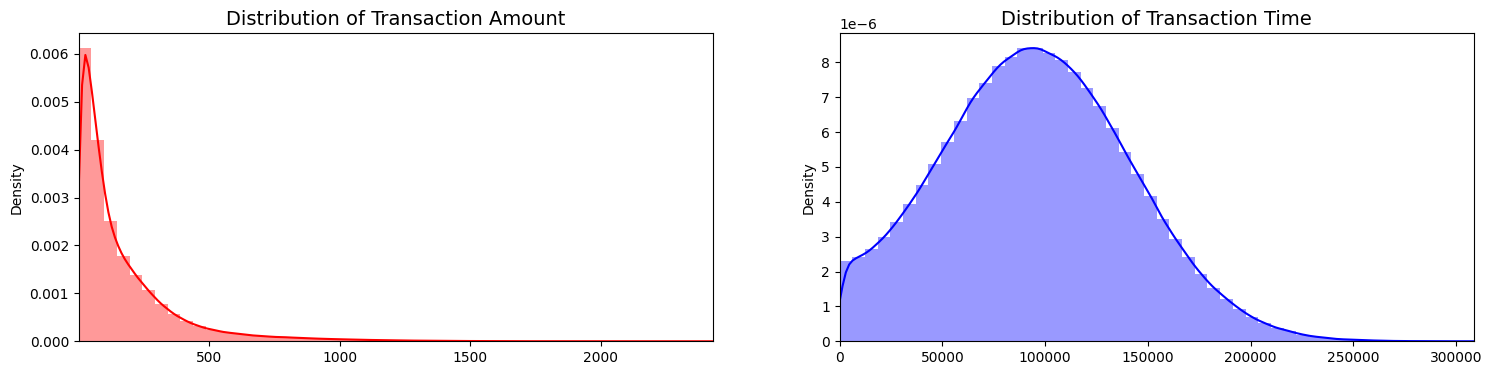

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = synthetic_df['Amount'].values
time_val = synthetic_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

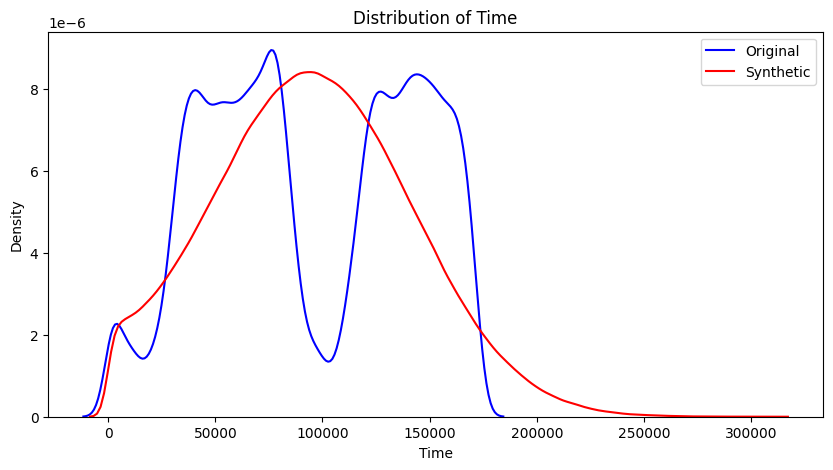

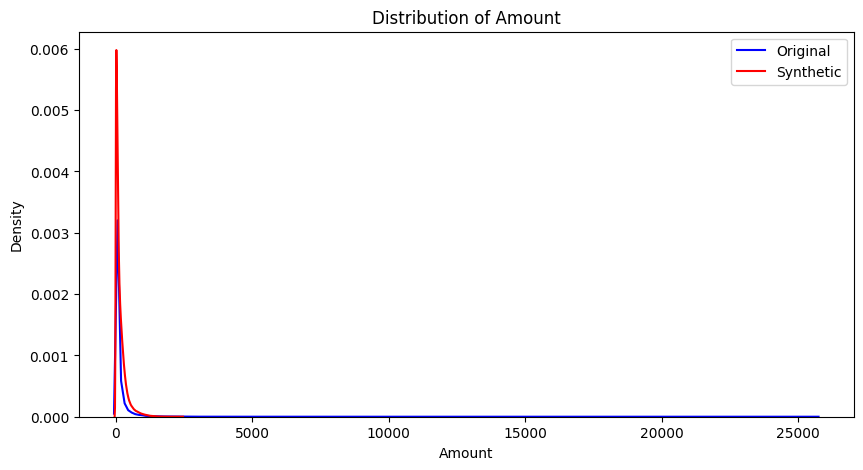

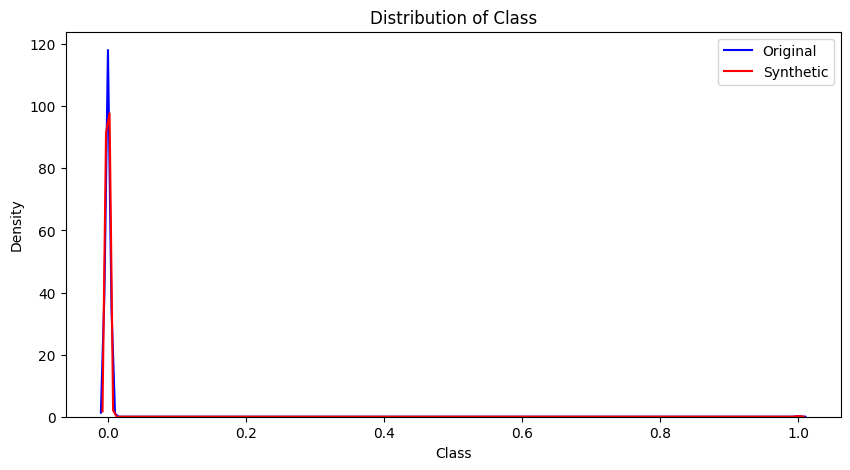

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features you're interested in
features = ['Time', 'Amount', 'Class']

# For each feature, create a subplot and plot the density of the original and synthetic data
for feature in features:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(df[feature], ax=ax, color='blue', label='Original')
    sns.kdeplot(synthetic_df[feature], ax=ax, color='red', label='Synthetic')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    plt.show()
